In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [3]:
# or
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [4]:
# or
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [5]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [6]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import mnist
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [10]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 12s 1ms/step - loss: 0.8210 - accuracy: 0.7731
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2605 - accuracy: 0.9268
Epoch 3/10
469/469 [==============================] - 0s 887us/step - loss: 0.2103 - accuracy: 0.9401
Epoch 4/10
469/469 [==============================] - 0s 931us/step - loss: 0.1786 - accuracy: 0.9489
Epoch 5/10
469/469 [==============================] - 0s 924us/step - loss: 0.1569 - accuracy: 0.9548
Epoch 6/10
469/469 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.9601: 0s - loss: 0.1392 - accuracy: 
Epoch 7/10
469/469 [==============================] - 0s 889us/step - loss: 0.1267 - accuracy: 0.9638
Epoch 8/10
469/469 [==============================] - 0s 918us/step - loss: 0.1181 - accuracy: 0.9658
Epoch 9/10
469/469 [==============================] - 0s 930us/step - loss: 0.1045 - accuracy: 0.9694
Epoch 10/10
469/469 [==============================] - 

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split = 0.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9717 - val_loss: 0.0817 - val_accuracy: 0.9758
Epoch 2/10
422/422 [==============================] - 1s 1ms/step - loss: 0.0939 - accuracy: 0.9731 - val_loss: 0.0800 - val_accuracy: 0.9758
Epoch 3/10
422/422 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.0818 - val_accuracy: 0.9748
Epoch 4/10
422/422 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9758 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 5/10
422/422 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9767 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 6/10
422/422 [==============================] - 0s 955us/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 7/10
422/422 [==============================] - 0s 962us/step - loss: 0.0733 - accuracy: 0.9788 - val_loss: 0.0849 - val_accuracy: 0.9745
Ep

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.117
Test Accuracy: 0.966


In [13]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.8829 - accuracy: 0.7583 - val_loss: 0.2493 - val_accuracy: 0.9293
Epoch 2/10
422/422 [==============================] - 0s 959us/step - loss: 0.2800 - accuracy: 0.9205 - val_loss: 0.1904 - val_accuracy: 0.9497
Epoch 3/10
422/422 [==============================] - 0s 983us/step - loss: 0.2253 - accuracy: 0.9350 - val_loss: 0.1637 - val_accuracy: 0.9548
Epoch 4/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9452 - val_loss: 0.1462 - val_accuracy: 0.9593
Epoch 5/10
422/422 [==============================] - 0s 945us/step - loss: 0.1701 - accuracy: 0.9509 - val_loss: 0.1397 - val_accuracy: 0.9590
Epoch 6/10
422/422 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9585 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 7/10
422/422 [==============================] - 0s 960us/step - loss: 0.1405 - accuracy: 0.9597 - val_loss: 0.1235 - val_accuracy: 0.963

In [15]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Epoch 1/100
422/422 [==============================] - 1s 1ms/step - loss: 0.9094 - accuracy: 0.7426 - val_loss: 0.2452 - val_accuracy: 0.9313
Epoch 2/100
422/422 [==============================] - 0s 997us/step - loss: 0.2846 - accuracy: 0.9198 - val_loss: 0.1963 - val_accuracy: 0.9458
Epoch 3/100
422/422 [==============================] - 0s 971us/step - loss: 0.2244 - accuracy: 0.9375 - val_loss: 0.1684 - val_accuracy: 0.9515
Epoch 4/100
422/422 [==============================] - 0s 964us/step - loss: 0.1968 - accuracy: 0.9442 - val_loss: 0.1515 - val_accuracy: 0.9575
Epoch 5/100
422/422 [==============================] - 0s 988us/step - loss: 0.1722 - accuracy: 0.9505 - val_loss: 0.1448 - val_accuracy: 0.9585
Epoch 6/100
422/422 [==============================] - 0s 958us/step - loss: 0.1487 - accuracy: 0.9580 - val_loss: 0.1292 - val_accuracy: 0.9633
Epoch 7/100
422/422 [==============================] - 0s 974us/step - loss: 0.1391 - accuracy: 0.9598 - val_loss: 0.1234 - val_accu

422/422 [==============================] - 0s 963us/step - loss: 0.0122 - accuracy: 0.9976 - val_loss: 0.1479 - val_accuracy: 0.9660
Epoch 58/100
422/422 [==============================] - 0s 954us/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.1469 - val_accuracy: 0.9692
Epoch 59/100
422/422 [==============================] - 0s 999us/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.1529 - val_accuracy: 0.9673
Epoch 60/100
422/422 [==============================] - 0s 964us/step - loss: 0.0105 - accuracy: 0.9982 - val_loss: 0.1486 - val_accuracy: 0.9705
Epoch 61/100
422/422 [==============================] - 0s 989us/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.1564 - val_accuracy: 0.9678
Epoch 62/100
422/422 [==============================] - 0s 962us/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.1489 - val_accuracy: 0.9692
Epoch 63/100
422/422 [==============================] - 0s 943us/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.1560 - val_accuracy

In [16]:
pd.DataFrame(history_callback.history)

,loss,accuracy,val_loss,val_accuracy
0,0.532532,0.855204,0.245249,0.931333
1,0.270040,0.924019,0.196270,0.945833
2,0.221360,0.937648,0.168407,0.951500
3,0.189655,0.946630,0.151487,0.957500
4,0.167694,0.952056,0.144814,0.958500
...,...,...,...,...
95,0.002604,0.999889,0.200007,0.968000
96,0.001807,0.999981,0.211136,0.967000
97,0.003260,0.999519,0.206657,0.967000
98,0.006244,0.998315,0.209926,0.966833


<AxesSubplot:>

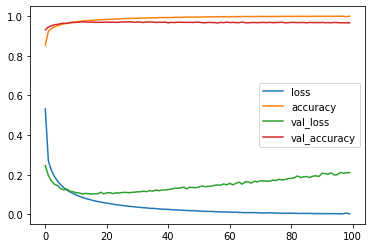

In [17]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

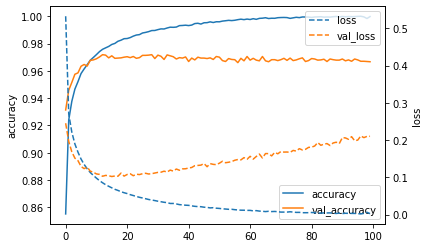

In [18]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.201
Test Accuracy: 0.970


In [20]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

In [21]:
grid.fit(X_train, y_train)

1500/1500 [==============================] - 1s 743us/step - loss: 0.1139 - accuracy: 0.96620s - l
Epoch 1/5
1500/1500 [==============================] - 2s 728us/step - loss: 0.6642 - accuracy: 0.8151
Epoch 2/5
1500/1500 [==============================] - 1s 751us/step - loss: 0.2201 - accuracy: 0.9368
Epoch 3/5
1500/1500 [==============================] - 1s 736us/step - loss: 0.1668 - accuracy: 0.9515
Epoch 4/5
1500/1500 [==============================] - 1s 801us/step - loss: 0.1436 - accuracy: 0.95710s - l
Epoch 5/5
1500/1500 [==============================] - 1s 545us/step - loss: 0.1106 - accuracy: 0.9678
Epoch 1/5
1500/1500 [==============================] - 2s 704us/step - loss: 0.6543 - accuracy: 0.8127
Epoch 2/5
1500/1500 [==============================] - 1s 687us/step - loss: 0.2106 - accuracy: 0.9410
Epoch 3/5
1500/1500 [==============================] - 1s 738us/step - loss: 0.1665 - accuracy: 0.9512
Epoch 4/5
1500/1500 [==============================] - 1s 805us/step - 

1500/1500 [==============================] - 1s 540us/step - loss: 0.0622 - accuracy: 0.9818
Epoch 1/5
1500/1500 [==============================] - 2s 722us/step - loss: 0.5339 - accuracy: 0.8545
Epoch 2/5
1500/1500 [==============================] - 1s 794us/step - loss: 0.1689 - accuracy: 0.9516
Epoch 3/5
1500/1500 [==============================] - 1s 905us/step - loss: 0.1172 - accuracy: 0.9674
Epoch 4/5
1500/1500 [==============================] - 1s 818us/step - loss: 0.0899 - accuracy: 0.9741
Epoch 5/5
1500/1500 [==============================] - 1s 627us/step - loss: 0.0578 - accuracy: 0.9843
Epoch 1/5
1500/1500 [==============================] - 2s 819us/step - loss: 0.5514 - accuracy: 0.8449
Epoch 2/5
1500/1500 [==============================] - 1s 822us/step - loss: 0.1692 - accuracy: 0.9516
Epoch 3/5
1500/1500 [==============================] - 1s 818us/step - loss: 0.1177 - accuracy: 0.9652
Epoch 4/5
1500/1500 [==============================] - 1s 801us/step - loss: 0.0942

1500/1500 [==============================] - 1s 785us/step - loss: 0.1376 - accuracy: 0.9585
Epoch 5/10
1500/1500 [==============================] - 1s 885us/step - loss: 0.1217 - accuracy: 0.9650
Epoch 6/10
1500/1500 [==============================] - 1s 649us/step - loss: 0.1057 - accuracy: 0.9685
Epoch 7/10
1500/1500 [==============================] - 1s 655us/step - loss: 0.0978 - accuracy: 0.9716
Epoch 8/10
1500/1500 [==============================] - 1s 749us/step - loss: 0.0846 - accuracy: 0.9750
Epoch 9/10
1500/1500 [==============================] - 1s 759us/step - loss: 0.0745 - accuracy: 0.9784
Epoch 10/10
1500/1500 [==============================] - 1s 565us/step - loss: 0.0659 - accuracy: 0.9807
Epoch 1/10
1500/1500 [==============================] - 2s 663us/step - loss: 0.6195 - accuracy: 0.8299
Epoch 2/10
1500/1500 [==============================] - 1s 733us/step - loss: 0.2110 - accuracy: 0.9394
Epoch 3/10
1500/1500 [==============================] - 1s 658us/step - lo

1500/1500 [==============================] - 1s 519us/step - loss: 0.0259 - accuracy: 0.9926
Epoch 1/10
1500/1500 [==============================] - 2s 730us/step - loss: 0.5427 - accuracy: 0.8528
Epoch 2/10
1500/1500 [==============================] - 1s 673us/step - loss: 0.1679 - accuracy: 0.9514
Epoch 3/10
1500/1500 [==============================] - 1s 695us/step - loss: 0.1076 - accuracy: 0.9681
Epoch 4/10
1500/1500 [==============================] - 1s 692us/step - loss: 0.0885 - accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 1s 684us/step - loss: 0.0711 - accuracy: 0.9789
Epoch 6/10
1500/1500 [==============================] - 1s 676us/step - loss: 0.0576 - accuracy: 0.9829
Epoch 7/10
1500/1500 [==============================] - 1s 677us/step - loss: 0.0501 - accuracy: 0.9851
Epoch 8/10
1500/1500 [==============================] - 1s 663us/step - loss: 0.0431 - accuracy: 0.9870
Epoch 9/10
1500/1500 [==============================] - 1s 696us/step - los

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0148 - accuracy: 0.9960
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0125 - accuracy: 0.9966
Epoch 10/10
1500/1500 [==============================] - 1s 693us/step - loss: 0.0156 - accuracy: 0.9945
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3734 - accuracy: 0.8930
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0953 - accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0596 - accuracy: 0.9815: 0s - los
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0428 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.01

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002879E298E88>,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             return_train_score=True)

In [22]:
res = pd.DataFrame(grid.cv_results_)

In [23]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.890051,0.503878,0.427660,0.007888,1,32,"{'epochs': 1, 'hidden_size': 32}",0.933750,0.928500,0.931000,...,0.930233,0.003016,9,0.933375,0.936833,0.937625,0.936833,0.930917,0.935117,0.002564
1,1.911936,0.058614,0.450798,0.014870,1,64,"{'epochs': 1, 'hidden_size': 64}",0.947167,0.940083,0.940000,...,0.941833,0.004340,8,0.950479,0.948146,0.949167,0.948250,0.945792,0.948367,0.001536
2,2.563615,0.057393,0.511744,0.037966,1,256,"{'epochs': 1, 'hidden_size': 256}",0.961583,0.956583,0.954417,...,0.958033,0.003627,6,0.968313,0.966229,0.964208,0.967771,0.966229,0.966550,0.001434
3,6.628713,0.475067,0.542160,0.178425,5,32,"{'epochs': 5, 'hidden_size': 32}",0.957500,0.952500,0.956083,...,0.955450,0.003236,7,0.967750,0.969187,0.969604,0.969708,0.971313,0.969513,0.001140
4,6.942324,0.462724,0.458685,0.039828,5,64,"{'epochs': 5, 'hidden_size': 64}",0.967000,0.966917,0.966167,...,0.966350,0.002788,4,0.981750,0.984271,0.982583,0.982500,0.984792,0.983179,0.001153
5,10.215048,0.577526,0.505757,0.042185,5,256,"{'epochs': 5, 'hidden_size': 256}",0.971833,0.974083,0.975667,...,0.973950,0.001760,2,0.989583,0.992375,0.992854,0.993604,0.992771,0.992238,0.001385
6,11.447851,0.663034,0.446520,0.056250,10,32,"{'epochs': 10, 'hidden_size': 32}",0.962500,0.957750,0.959750,...,0.961150,0.002821,5,0.982000,0.980687,0.980854,0.986604,0.984396,0.982908,0.002274
7,12.020134,1.011617,0.433549,0.017371,10,64,"{'epochs': 10, 'hidden_size': 64}",0.972917,0.969583,0.969917,...,0.969517,0.002059,3,0.991896,0.994000,0.992562,0.993271,0.991000,0.992546,0.001044
8,18.454013,0.713344,0.484522,0.043447,10,256,"{'epochs': 10, 'hidden_size': 256}",0.979250,0.972833,0.975167,...,0.975450,0.002111,1,0.998208,0.994917,0.997688,0.999125,0.994479,0.996883,0.001848


In [24]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930233          0.935117
             64                        0.941833          0.948367
             256                       0.958033          0.966550
5            32                        0.955450          0.969513
             64                        0.966350          0.983179
             256                       0.973950          0.992238
10           32                        0.961150          0.982908
             64                        0.969517          0.992546
             256                       0.975450          0.996883

In [25]:
grid.score(X_test, y_test)

313/313 [==============================] - 0s 745us/step - loss: 0.0759 - accuracy: 0.9817


0.9817000031471252

In [26]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 7s 15ms/step - loss: 0.3621 - accuracy: 0.8892 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 2/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0743 - accuracy: 0.9771 - val_loss: 0.0838 - val_accuracy: 0.9762
Epoch 3/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0493 - accuracy: 0.9835 - val_loss: 0.0754 - val_accuracy: 0.9787
Epoch 4/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0868 - val_accuracy: 0.9762
Epoch 5/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0672 - val_accuracy: 0.9813
Epoch 6/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0796 - val_accuracy: 0.9805
Epoch 7/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0749 - val_accuracy: 0.9800

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)

In [28]:
score

[0.10804439336061478, 0.9818999767303467]

In [29]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_104 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_105 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

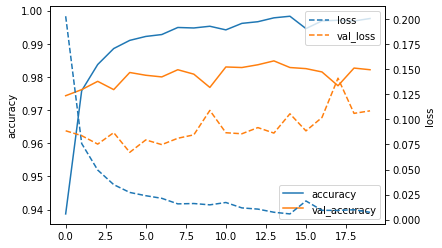

In [30]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [31]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 8s 17ms/step - loss: 0.5085 - accuracy: 0.8390 - val_loss: 0.0996 - val_accuracy: 0.9702
Epoch 2/20
422/422 [==============================] - 8s 18ms/step - loss: 0.1436 - accuracy: 0.9557 - val_loss: 0.0854 - val_accuracy: 0.9748
Epoch 3/20
422/422 [==============================] - 7s 17ms/step - loss: 0.1113 - accuracy: 0.9660 - val_loss: 0.0705 - val_accuracy: 0.9802
Epoch 4/20
422/422 [==============================] - 7s 16ms/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.0713 - val_accuracy: 0.9778
Epoch 5/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0839 - accuracy: 0.9736 - val_loss: 0.0615 - val_accuracy: 0.9828
Epoch 6/20
422/422 [==============================] - 7s 17ms/step - loss: 0.0693 - accuracy: 0.9778 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 7/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0633 - accuracy: 0.9792 - val_loss: 0.0648 - val_accuracy: 0.9820

In [32]:
model_dropout.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_107 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

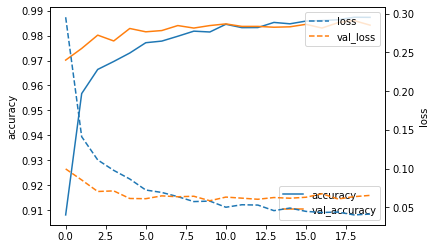

In [33]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [34]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)

In [35]:
score

[0.06138937920331955, 0.9836999773979187]